In [1]:
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pdb

In [2]:
from config import get_config
import argparse
from Learner import face_learner
from data.data_pipe import get_val_pair
from torchvision import transforms as trans

/home/f/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
conf = get_config(training=False)

In [5]:
conf.use_mobilfacenet = True

In [6]:
learner = face_learner(conf, inference=True)

{'data_path': PosixPath('data'), 'work_path': PosixPath('work_space'), 'model_path': PosixPath('work_space/models'), 'log_path': PosixPath('work_space/log'), 'save_path': PosixPath('work_space/save'), 'input_size': [112, 112], 'embedding_size': 512, 'use_mobilfacenet': True, 'net_depth': 50, 'drop_ratio': 0.6, 'net_mode': 'ir_se', 'device': device(type='cuda', index=0), 'test_transform': Compose(
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
), 'data_mode': 'emore', 'vgg_folder': PosixPath('data/faces_vgg_112x112'), 'ms1m_folder': PosixPath('data/faces_ms1m_112x112'), 'emore_folder': PosixPath('data/faces_emore'), 'batch_size': 100, 'facebank_path': PosixPath('data/facebank'), 'threshold': 1.5, 'face_limit': 10, 'min_face_size': 30}
MobileFaceNet model generated


In [7]:
learner.load_state(conf, 'mobilefacenet.pth', True, True)

lfw - accuray:0.9918333333333333, threshold:1.521


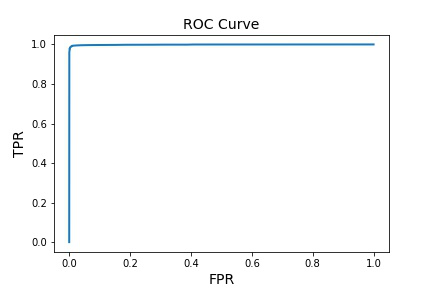

In [14]:
lfw, lfw_issame = get_val_pair(conf.emore_folder, 'lfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, lfw, lfw_issame, nrof_folds=10, tta=True)
print('lfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)